# Proyecto análisis de conversación de mensajería

## Cargar datos
- Exportar una conversación personal o grupal de Whastapp o Telegram en un formato adecuado (JSON, CSV, etc), no exportar audios, archivos multimedia, etc
- Importar archivo y convertirlo en dataframe

In [12]:
import json
import pandas as pd

#Buscamos el archivo y lo abrimos como json
archivo = "../data/result.json"
chat = open(archivo, encoding='utf8')
data = json.load(chat)

# Obtenemos los mensajes del json
dmain = pd.DataFrame(data["messages"])

# Filtramos solo elementos encesarios y mostramos en pantalla.
dataframe = dmain.filter(items = ['id','from', 'reply_to_message_id' ,'text'])
dataframe.columns = ['ID', 'USUARIO', 'RESPUESTA_ID', 'COMENTARIO']
dataframe

,ID,USUARIO,RESPUESTA_ID,COMENTARIO
0,1023,NaN,NaN,
1,1024,NaN,NaN,
2,1025,NaN,NaN,
3,1026,NaN,NaN,
4,1027,NaN,NaN,
5,1028,NaN,NaN,
6,1029,NaN,NaN,
7,1030,NaN,NaN,
8,1031,Matias Navarro,NaN,Buenas tardes a todos! Como estan? Recuerden q...
9,1032,NaN,NaN,


## Conocer los datos

- Observar que tipo de datos tiene el dataframe y que tipo de valores tiene
- Explicar que significa cada campo y que tipo de acciones quedan registradas

In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            44 non-null     int64  
 1   USUARIO       33 non-null     object 
 2   RESPUESTA_ID  3 non-null      float64
 3   COMENTARIO    44 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ KB


## Datos faltantes

- Analizar de manera visual y no visual si existen datos faltantes

In [15]:
import numpy as np

# Creamos una lista de elementos perdidos y obtenemos suma y promedio de valores nulos.
perdidos = []
for column in dataframe.columns:
    attribute = {}
    attribute["COLUMNA"] = column
    attribute["PORCENTAJE"] = np.mean(dataframe[column].isnull())*100
    attribute["CANTIDAD"] = np.sum(dataframe[column].isnull())
    perdidos.append(attribute)  

# Convertir lista de diccionarios en dataframe
df_perdidos = pd.DataFrame(perdidos)
df_perdidos

,COLUMNA,PORCENTAJE,CANTIDAD
0,ID,0.000000,0
1,USUARIO,25.000000,11
2,RESPUESTA_ID,93.181818,41
3,COMENTARIO,0.000000,0


- Tratar datos faltantes en el caso que los haya
- Explicar qué método se utilizó y por qué:
    - RTA: Se utilizó el metodo de tratamiento, colocando los valores nulos con un valor especifico o media. 

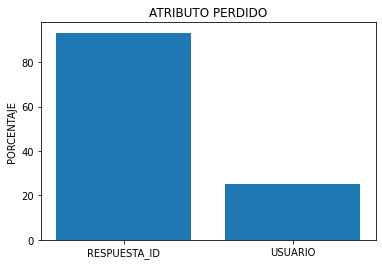

In [19]:
import matplotlib.pyplot as plt

# Generamos un nuevo dataframe con respuesta_id y usuario, con su porcentaje y cantidad.
df_perdidos = df_perdidos.sort_values('PORCENTAJE', ascending=False)
df_porcentaje = df_perdidos.loc[(df_perdidos['PORCENTAJE'] > 0)]

# Mostramos el nuevo dataframe en gráfico de barra
plt.bar(df_porcentaje["COLUMNA"], df_porcentaje["PORCENTAJE"])
plt.ylabel('PORCENTAJE')
plt.title('ATRIBUTO PERDIDO')

#Mostramos tabla
plt.show()

In [25]:
# Removemos elementos vacios de todas las columnas.
df_arreglado = dataframe.copy(deep=False) # Hacemos una copia de la base de datos original.
media = df_arreglado['RESPUESTA_ID'].mean() # Obtiene la media segun respuestas.
df_arreglado['RESPUESTA_ID'] = df_arreglado['RESPUESTA_ID'].fillna(media) # Los elementos vacios en respuesta le coloca la media.
df_arreglado['USUARIO'] = df_arreglado['USUARIO'].fillna('usuario') # Los elementos vacios en usuario los muestra como "usuario".
df_arreglado

,ID,USUARIO,RESPUESTA_ID,COMENTARIO
0,1023,usuario,1103.666667,
1,1024,usuario,1103.666667,
2,1025,usuario,1103.666667,
3,1026,usuario,1103.666667,
4,1027,usuario,1103.666667,
5,1028,usuario,1103.666667,
6,1029,usuario,1103.666667,
7,1030,usuario,1103.666667,
8,1031,Matias Navarro,1103.666667,Buenas tardes a todos! Como estan? Recuerden q...
9,1032,usuario,1103.666667,


## Verifico si hay datos erroneos de nuevo

In [26]:
# Creamos una lista de elementos perdidos y obtenemos suma y promedio de valores nulos.
perdidos = []
for column in dataframe.columns:
    attribute = {}
    attribute["COLUMNA"] = column
    attribute["PORCENTAJE"] = np.mean(df_arreglado[column].isnull())*100
    attribute["CANTIDAD"] = np.sum(df_arreglado[column].isnull())
    perdidos.append(attribute)  

# Convertir lista de diccionarios en dataframe
df_perdidos = pd.DataFrame(perdidos)
df_perdidos

,COLUMNA,PORCENTAJE,CANTIDAD
0,ID,0.0,0
1,USUARIO,0.0,0
2,RESPUESTA_ID,0.0,0
3,COMENTARIO,0.0,0


## Outliers

- Analizar de manera visual y no visual si existen valores atípicos para cada valor no categórico

In [27]:
dataframe.describe()

,ID,RESPUESTA_ID
count,44.000000,3.000000
mean,1075.090909,1103.666667
std,37.725334,3.055050
min,1023.000000,1101.000000
25%,1046.500000,1102.000000
50%,1061.500000,1103.000000
75%,1106.250000,1105.000000
max,1132.000000,1107.000000


- Si existen valores atípicos, ¿estos son causados por errores en la carga de datos o por otra razón?. Explicar la razón
    - RTA: Este error se produce en los casos de no realizar respuestas a un id en especifico. Dando muchos valores nulos, al colocar esos valores como medio, las respuestas a un id fuera de esa media sale como error. Lo ideal aquí es quitar la columna, en caso de no utilizarse.

In [34]:
Q1 = df_arreglado.quantile(0.25) # Obtenemos el primer cuartil
Q3 = df_arreglado.quantile(0.75) # Obtenemos el tercer cuartil
IQR = Q3 - Q1
rango_inferior = Q1 - 1.5 * IQR
rango_superior = Q3 + 1.5 * IQR
print(IQR)

ID              59.75
RESPUESTA_ID     0.00
dtype: float64


In [39]:
# Muestro verdadero y falso segun rango inferior y superior de los cuartiles.
df_bool = (df_arreglado < rango_inferior) | (df_arreglado > rango_superior)
df_bool

/tmp/ipykernel_6604/3110398111.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_bool = (df_arreglado < rango_inferior) | (df_arreglado > rango_superior)


,COMENTARIO,ID,RESPUESTA_ID,USUARIO
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


<AxesSubplot: >

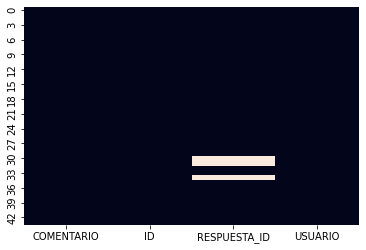

In [40]:
# Se muestra en mapa de color
sns.heatmap(df_bool, cbar=False)